In [2]:
# Чисто технический блок, импортируем на страницу необходимые (и не очень) инструменты
%matplotlib inline
import numpy as np
import unicodecsv as csv
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
lists = []
for i in xrange(3,11):
    lists.append(find_to_dict(i))
print lists

In [ ]:
# Записываем в файл паттерны и его вхождения
for i in lists:
    for ii in i:
        string = ii + ','
        for iii in i[ii]:
            string += str(iii) + ','
        f = open('list_insides.csv', 'ab')
        f.write(string)
        f.write('\n')
        f.close

In [ ]:
# Формируем список всех типов катастроф
# В нем нет большой необходимости для дальнейших построений
with open('base.csv', 'r') as csvfile:
    csv_base = csv.reader(csvfile)
    list_type = []
    for i in csv_base:
        if i[1] not in list_type:
            list_type.append(i[1])

# Выводим все типы катастроф
# Просто список всех катастроф для справки
print 'Количество типов: %s' % len(list_type)
for i in list_type:
    print i

In [ ]:
# Основа всего! Смотрим на необработаный список списков формата: год-катастрофа
with open('base.csv', 'r') as csvfile:
    csv_base = csv.reader(csvfile)
    csv_base_list = []
    for row in csv_base:
        print row
        csv_base_list.append(row)

In [ ]:
print len(csv_base_list)
csv_base_list

In [ ]:
# Формируем сортированый по годам словарь катастроф
with open('base.csv', 'r') as csvfile:
    csv_base = csv.reader(csvfile)
    
    nord_dict = {}
    for row in csv_base:
        key = row[0].zfill(4)
        if key not in nord_dict:
            nord_dict[key] = []
        if row[1] not in nord_dict[key]:
            nord_dict[key].append(row[1])
    ord_dict = collections.OrderedDict(sorted(nord_dict.items()))

In [ ]:
# Смотрим на сортированый словарь
for i in ord_dict:
    string = '%s: ' % i
    for ii in ord_dict[i]:
        string += ii + ''
    print to_lat(string)

In [ ]:
# Список всех катастроф по порядку
# Сливаем предыдущий сортированый словарь в один список
list_kat = []
for i in ord_dict:
    for ii in ord_dict[i]:
        list_kat.append(ii)
print 'Количество зарегистрированых катастроф: %s' % len(list_kat)

In [ ]:
# Формируем строку всех катастроф из списка всех катастроф
# Сливаем предыдущий список в одну строку
string_kat = ''.join(list_kat)
print string_kat

In [ ]:
# Заменяем в строке всех катастроф кириллические буквы на латиницу
# Иначе усложнится алгоритм поиска
def to_lat(string_kat):
    string_kat_lat = string_kat.replace('а', 'aa')
    string_kat_lat = string_kat_lat.replace('б', 'bb')
    string_kat_lat = string_kat_lat.replace('в', 'vv')
    string_kat_lat = string_kat_lat.replace('г', 'gg')
    string_kat_lat = string_kat_lat.replace('д', 'dd')
    string_kat_lat = string_kat_lat.replace('е', 'ee')
    string_kat_lat = string_kat_lat.replace('ё', 'ee')
    string_kat_lat = string_kat_lat.replace('ж', 'jj')
    string_kat_lat = string_kat_lat.replace('з', 'zz')
    string_kat_lat = string_kat_lat.replace('и', 'ii')
    string_kat_lat = string_kat_lat.replace('к', 'kk')
    string_kat_lat = string_kat_lat.replace('л', 'll')
    string_kat_lat = string_kat_lat.replace('м', 'mm')
    string_kat_lat = string_kat_lat.replace('н', 'nn')
    string_kat_lat = string_kat_lat.replace('о', 'oo')
    string_kat_lat = string_kat_lat.replace('п', 'pp')
    string_kat_lat = string_kat_lat.replace('р', 'rr')
    string_kat_lat = string_kat_lat.replace('с', 'ss')
    string_kat_lat = string_kat_lat.replace('т', 'tt')
    string_kat_lat = string_kat_lat.replace('у', 'uu')
    string_kat_lat = string_kat_lat.replace('ф', 'ff')
    string_kat_lat = string_kat_lat.replace('х', 'hh')
    string_kat_lat = string_kat_lat.replace('ц', 'cc')
    string_kat_lat = string_kat_lat.replace('ч', 'ch')
    string_kat_lat = string_kat_lat.replace('ш', 'sh')
    string_kat_lat = string_kat_lat.replace('щ', 'sj')
    string_kat_lat = string_kat_lat.replace('ь', 'mz')
    string_kat_lat = string_kat_lat.replace('ы', 'yi')
    string_kat_lat = string_kat_lat.replace('ъ', 'tz')
    string_kat_lat = string_kat_lat.replace('э', 'ye')
    string_kat_lat = string_kat_lat.replace('ю', 'yu')
    string_kat_lat = string_kat_lat.replace('я', 'ya')
    string_kat_lat = string_kat_lat.replace('Р', 'br') # Кириллическая Р
    string_kat_lat = string_kat_lat.replace('P', 'rb') # Латинская P
    return string_kat_lat

In [ ]:
# Заменяем в строке всех катастроф кириллические буквы на латиницу
# Иначе усложнится алгоритм поиска
def to_kir(string_kat):
    string_kat_lat = string_kat.replace('$aa', '$а')
    string_kat_lat = string_kat_lat.replace('$bb', '$б')
    string_kat_lat = string_kat_lat.replace('$vv', '$в')
    string_kat_lat = string_kat_lat.replace('$gg', '$г')
    string_kat_lat = string_kat_lat.replace('$dd', '$д')
    string_kat_lat = string_kat_lat.replace('$ee', '$е')
    string_kat_lat = string_kat_lat.replace('$ee', '$ё')
    string_kat_lat = string_kat_lat.replace('$jj', '$ж')
    string_kat_lat = string_kat_lat.replace('$zz', '$з')
    string_kat_lat = string_kat_lat.replace('$ii', '$и')
    string_kat_lat = string_kat_lat.replace('$kk', '$к')
    string_kat_lat = string_kat_lat.replace('$ll', '$л')
    string_kat_lat = string_kat_lat.replace('$mm', '$м')
    string_kat_lat = string_kat_lat.replace('$nn', '$н')
    string_kat_lat = string_kat_lat.replace('$oo', '$о')
    string_kat_lat = string_kat_lat.replace('$pp', '$п')
    string_kat_lat = string_kat_lat.replace('$rr', '$р')
    string_kat_lat = string_kat_lat.replace('$ss', '$с')
    string_kat_lat = string_kat_lat.replace('$tt', '$т')
    string_kat_lat = string_kat_lat.replace('$uu', '$у')
    string_kat_lat = string_kat_lat.replace('$ff', '$ф')
    string_kat_lat = string_kat_lat.replace('$hh', '$х')
    string_kat_lat = string_kat_lat.replace('$cc', '$ц')
    string_kat_lat = string_kat_lat.replace('$ch', '$ч')
    string_kat_lat = string_kat_lat.replace('$sh', '$ш')
    string_kat_lat = string_kat_lat.replace('$sj', '$щ')
    string_kat_lat = string_kat_lat.replace('$mz', '$ь')
    string_kat_lat = string_kat_lat.replace('$yi', '$ы')
    string_kat_lat = string_kat_lat.replace('$tz', '$ъ')
    string_kat_lat = string_kat_lat.replace('$ye', '$э')
    string_kat_lat = string_kat_lat.replace('$yu', '$ю')
    string_kat_lat = string_kat_lat.replace('$ya', '$я')
    string_kat_lat = string_kat_lat.replace('$br', '$Р') # Кириллическая Р
    string_kat_lat = string_kat_lat.replace('$rb', '$P') # Латинская P
    return string_kat_lat

In [ ]:
def get_year(index):
    num_kat = index / 5
    count_kat = 0
    y = 0
    for i in ord_dict:
        if count_kat < num_kat: 
            count_kat += len(ord_dict[i])
        else:
            y = i
            break
    return y

In [ ]:
# Функция поиска, принимает количество типов катастроф идущих подряд
# Выдает паттерн, индекс паттерна и количество его вхождений
def find(step):
    m = 0
    l = []
    string_lat = to_lat(string_kat)
    for i in xrange(0, len(string_lat), 5):
        count = string_lat.count(string_lat[i:i+(step*5)])
        if string_lat[i:i+(step*5)].count('$') < step:
            continue
        if count > 1:
            m = count
            k = [string_lat[i:i+(step*5)], get_year(i-6), i-6, get_year(i-6+(step*5)), i-6+(step*5), count]
            l.append(k)
            print k
    return l

In [ ]:
def find_to_dict(step):
    m = 0
    l = []
    dic = {}
    string_lat = to_lat(string_kat)
    
    for i in xrange(0, len(string_lat), 5):
        count = string_lat.count(string_lat[i:i+(step*5)])
    
        if string_lat[i:i+(step*5)].count('$') < step:
            continue
        
        if count > 1:
            m = count
            try:
                dic[to_kir(string_lat[i:i+(step*5)])].append(get_year(i-6))
                dic[to_kir(string_lat[i:i+(step*5)])].append(get_year(i-6+(step*5)))
            except KeyError:
                dic[to_kir(string_lat[i:i+(step*5)])] = []
                dic[to_kir(string_lat[i:i+(step*5)])].append(get_year(i-6))
                dic[to_kir(string_lat[i:i+(step*5)])].append(get_year(i-6+(step*5)))                
            k = [string_lat[i:i+(step*5)], get_year(i-6), i-6, get_year(i-6+(step*5)), i-6+(step*5), count]
            l.append(k)
#            print k

    return dic

In [ ]:
def list_kat(years):
    kat_list = []
    for year in years:
        for kat in ord_dict[year]:
            if kat not in kat_list:
                kat_list.append(kat)
    return kat_list

In [ ]:
list_1346_1349 = list_kat(['1346','1347','1348','1349'])
print len(list_1346_1349)
list_1802_1805 = list_kat(['1802','1803','1804','1805'])
print len(list_1802_1805)

In [ ]:
len(set(list_1346_1349) & set(list_1802_1805))

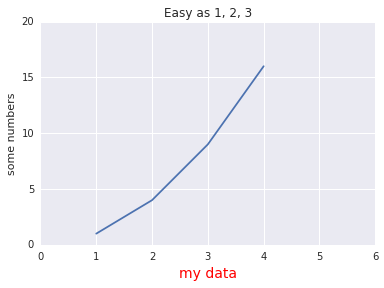

In [15]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.ylabel('some numbers')
plt.xlabel('my data', fontsize=14, color='red')
plt.title('Easy as 1, 2, 3') # subplot 211 title
plt.axis([0, 6, 0, 20])
plt.show()

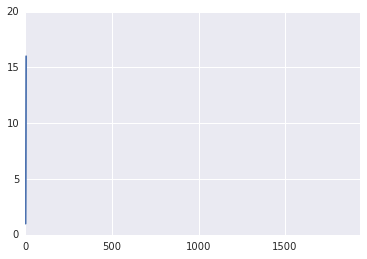

In [10]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.axis([0, 1933, 0, 20])
plt.show()

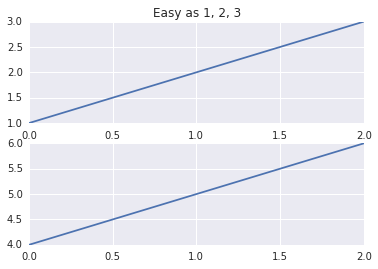

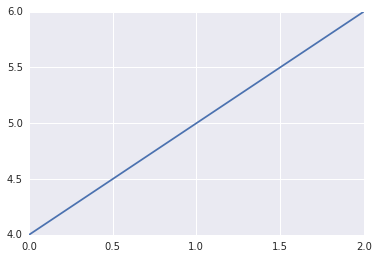

In [11]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

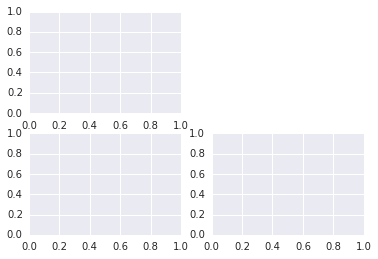

In [17]:
plt.subplot(2,2,1)
plt.subplot(2,2,3)
plt.subplot(2,2,4)

plt.show()

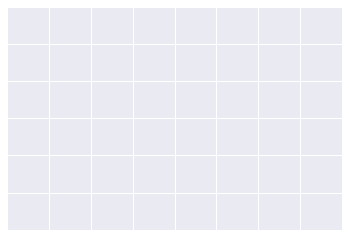

In [19]:
axes = plt.gca()
axes.set_xlim(0,4)
axes.set_ylim(0,3)
axes.set_xticklabels([])
axes.set_yticklabels([])

plt.show()